<a href="https://colab.research.google.com/github/maxiperezc/memoscopio/blob/master/HPC/cargaslibres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example1

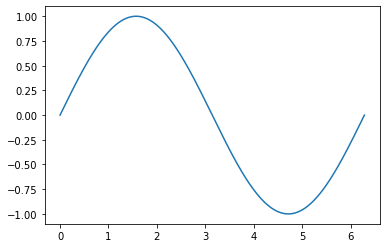

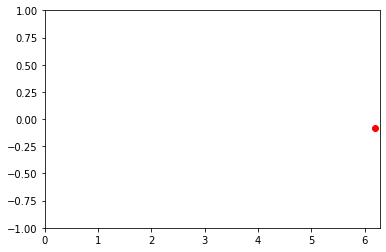

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

TWOPI = 2*np.pi

# First set up the figure, the axis, and the plot element we want to animate
t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

#plt.close() what?

figure = plt.figure()
axes = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

#line, = axes.plot([], [], lw=2)

# initialization function: plot the background of each frame
#def init():
#    line.set_data([], [])
#    return (line,)

# animation function. This is called sequentially  
#def animate(i):
 #   x = np.linspace(0, 2, 1000)
 #   y = np.sin(2 * np.pi * (x - 0.01 * i))
 #   line.set_data(x, y)
 #   return (line,)

def animate(i):
  redDot.set_data(i, np.sin(i))
  return redDot,
  
anim = animation.FuncAnimation(figure, animate, frames=np.arange(0.0, TWOPI, 0.1), interval=100, blit=True, repeat=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim
  

# Example 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import time

def d_f_x_finite_difference(x_array,f_x,at_x):
  upper = np.argmax(x_array>at_x)
  lower = upper-1
  if(upper==0):
    upper = 1
    lower = 0
  return ((f_x[upper]-f_x[lower])/(x_array[upper]-x_array[lower]))

def interpolate_y(at_x, y_values, x_values):
  x_argm = np.argmax(x_values>at_x)
  x_upper = x_values[x_argm]
  x_lower = x_values[x_argm-1]
  y_upper = y_values[x_argm]
  y_lower = y_values[x_argm-1]

  slope_of_interpolation = (y_upper - y_lower)/(x_upper - x_lower)
  y_interpolated = slope_of_interpolation*at_x + (y_upper - slope_of_interpolation*x_upper)  
  return y_interpolated


# animate over some set of x, y
x_values = np.linspace(-4, 4, 100)
y_values = np.sin(x_values)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()

ax.set_xlim(( -4, 4))
ax.set_ylim((-2, 2))

line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)  

# initialization function: plot the background of each frame
def init():
    line1.set_data(x_values, y_values)      
    return (line1,)

# animation function. This is called sequentially
def animate(i):
  at_x = x_values[i]
  d_x = d_f_x_finite_difference(x_values, y_values, at_x)
  y_interpolated = interpolate_y(at_x, y_values, x_values)
  mxb = d_x*x_values.T + (y_interpolated - d_x*at_x)
  mxb = np.matrix(mxb).T
  line2.set_data(x_values, mxb)
  return (line2,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim



# Reference Link
http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/